In [1]:
%matplotlib inline


==================
Nearmiss 1 & 2 & 3
==================

An illustration of the nearmiss 1 & 2 & 3 method.




Automatically created module for IPython interactive environment


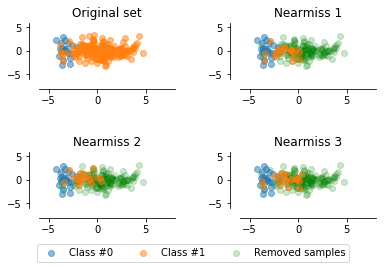

In [2]:
# Authors: Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.under_sampling import NearMiss

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply Nearmiss
version = [1, 2, 3]
nm = [NearMiss(version=v, return_indices=True) for v in version]

X_resampled = []
y_resampled = []
X_res_vis = []
idx_samples_removed = []
for method in nm:
    X_res, y_res, idx_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))
    idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                       idx_res)

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax_res = [ax2, ax3, ax4]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(version)):
    # plot the missing samples
    c3 = ax_res[i].scatter(X_vis[idx_samples_removed, 0],
                           X_vis[idx_samples_removed, 1],
                           alpha=.2, label='Removed samples',
                           c='g')
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'Nearmiss {}'.format(version[i]))

plt.figlegend((c0, c1, c3), ('Class #0', 'Class #1', 'Removed samples'),
              loc='lower center', ncol=3, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()